<center><font size="+4">IProML 2021/2022</font></center>
<center><font size="+4">Introduction to Programming and</font></center>
<center><font size="+4">Machine Learning in Python</font></center>
<center><font size="+4">MODULE 2</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin <a href= "mailto:a.vandin@santannapisa.it">a.vandin@santannapisa.it</a>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Daniele Licari <a href= "mailto:a.vandin@santannapisa.it">d.licari@santannapisa.it</a></font></center>

---


<center><font size="+2">Part 2</font></center>
<center><font size="+1">Breast Cancer Diagnosis 2</font></center>
<center><font size="+1">Unsupervised learning</font></center>

---
---

**This notebook provides an an introduction to the unsupervised learning pipeline**
   * Dimensionality Reduction
   * Clustering Analysis

You can find more details in the [APPENDIX](#APPENDIX) of this document.

In particular, this notebook will introduce the libraries:

   * [scikit-learn](https://scikit-learn.org/stable/): simple and efficient tools for predictive data analysis 
   * [Seaborn](http://seaborn.pydata.org/): seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**References** 

Some in-depth study material:

* <mark> [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](https://duchesnay.github.io/pystatsml)</mark>
* [Topics in Statistical Learning, Francesca Chiaromonte](https://github.com/EMbeDS-education/StatsAndComputing20202021/tree/main/TSL/slides)
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page)

Some pictures have been taken from these sources.


# Benign and Malignant Breast Cancer Case Study 
We will analize Wisconsin Breast Cancer Dataset (WBCD), features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

<img src="images/Breast-Biopsy-2.jpg" >

![alt text](images/fna-benign1.png)
![alt text](images/fna-malignant1.png)

**Attribute Information**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Labels Class:**
* malignant
* benign



This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

![](images/machine_learning_cancer.png)


In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    # numpy for numerical computing
    %pip install numpy
    # pandas for data processing
    %pip install pandas 
     # seaborn for visualization
    %pip install seaborn
    #sklearn for machine learning 
    %pip install sklearn 
    # scipy for statistical functions 
    %pip install scipy  
    # statsmodels for statistical models
    %pip install statsmodels
    # IProML for visualization and teaching purpose
    %pip install pyembeds-sssa

## Load libraries

In [2]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
from IPython.display import display, Markdown # display Markdown code using Python
import seaborn as sns # data visualization library based on matplotlib

from warnings import filterwarnings
filterwarnings('ignore')


## Load data
Let's load preprocessed data by the Part 1 into Pandas, and get *Features matrix* and *Target array*

In [4]:
#load dataset, we will first load the data into a Pandas DataFrame object and display its content

# load dataset from remote file
data = pd.read_csv('https://raw.githubusercontent.com/EMbeDS-education/SNS-IProML2022/main/jupyter/jupyterNotebooks/data/WBCD_preprocessed.csv', index_col=0)

# load dataset from local disk
# data = pd.read_csv('data/WBCD_preprocessed.csv', index_col=0)

df_X = data.iloc[:,:-1] # Features matrix
df_y = data.iloc[:,-1] # Target array
data.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
4,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant
5,15.70,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.8902,27.19,...,0.02165,0.005082,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,malignant


In [4]:
data.shape

(557, 24)

# Dimensionality Reduction
Datasets often have many (hundreds or even thousands) features and dropping redundant variables is not enough to reduce the dimensionality of the dataset.

Too many variables can cause such problems below:
* Increased computational cost
* Too complex visualization problems
* Decrease efficiency by including variables that have no effect on the analysis
* Make data interpretation difficult




more details and other dimensionality reduction algorithms are listed in the [APPENDIX](#APPENDIX).

In [5]:
from IPython.display import HTML 
#  Dimensionality Reduction
HTML('<iframe width="800" height="550" src="https://www.youtube.com/embed/smWJ-f8fSOY?mute=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Principal Component Analysis (PCA)
[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

![](images/pca.png)

**PCA reduces the dimensionality of a dataset, while preserving as much ‘variability’ (i.e.statistical information) as possible.
It converts a set of possibly correlated predictors into a set of linearly uncorrelated variables**
(using [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of the data to project it to a lower dimensional space). 

<!-- PCA is based on two basic considerations: 
* high correlation between variables indicates redundancy in the data; 
* the most important variables express higher variance. 

Based on these considerations, the model simplifies the complexity of the variables; -->

**PCA tries to explain the covariance structure of the data by means of a (hopefully small) number of components `(PC1, PC2,..,PCn)=PCA(X1,X2,...,Xn)`.These components are linear combinations of the original variables**, and often allow for an interpretation and a better understanding of the different sources of variation. 

<!-- ![](img/pca.png)  -->

In [6]:
from IPython.display import HTML
# Very Nive Principal component analysis (PCA)  youtube video by Serrano.Academy
HTML('<iframe width="800" height="550" src="https://www.youtube.com/embed/g-Hb26agBFg?mute=1&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Before applying PCA, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features


In [7]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

scaler = StandardScaler() # scaling data before PCA
scaled_features =scaler.fit_transform(df_X.values)
# save the results into a new dataframe
df_X_scaled = pd.DataFrame(scaled_features, index=df_X.index, columns=df_X.columns)
df_X_scaled

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-2.063841,1.047784,1.607158,3.457953,2.843937,2.600666,2.302948,2.464601,-0.563364,3.296223,...,0.766978,1.334295,1.257532,-1.364384,1.335271,2.796316,2.261630,2.335455,2.988855,2.143890
1,-0.346617,2.018864,-0.821099,-0.473495,0.017057,0.579227,0.022494,-0.891192,-0.888200,1.021069,...,0.329837,-0.841171,-0.041644,-0.369166,-0.376614,-0.426094,-0.119748,1.113659,-0.242955,0.340899
2,0.462035,1.651348,0.972320,1.132202,1.482208,2.096160,0.988024,-0.385691,-0.787755,1.593299,...,1.600554,0.319347,0.465625,-0.022149,0.541741,1.174347,0.937517,1.990767,1.263827,0.254008
4,-1.143651,1.932214,0.301411,0.596706,1.490164,1.476039,0.011224,-0.562312,-0.798368,1.605059,...,1.294378,-0.346502,0.731222,-1.472418,0.229678,-0.302310,0.682315,0.752044,-0.916903,-0.397676
5,-0.827626,-0.517597,2.285281,1.331778,0.957141,0.860910,1.055649,2.071772,-0.591981,-0.323888,...,-0.029433,0.204778,0.715110,-0.313512,2.088679,1.849775,1.368423,0.930543,1.913331,2.475766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.726938,2.476019,1.073317,0.262762,2.098765,2.385200,-0.300601,-0.958186,0.101281,3.448244,...,2.301395,-1.211836,0.303533,0.120259,0.390168,-0.259928,0.736495,1.661467,-1.447681,-0.737396
565,2.088634,1.824648,0.121059,0.015763,0.774163,1.308133,-0.202921,-1.095219,2.388781,1.737002,...,0.928030,-0.155104,-0.546473,2.059952,-0.697593,-0.388421,0.284828,0.756661,-0.553739,-1.025826
566,2.049131,0.620807,-0.834806,-0.005973,0.091442,0.128588,-0.811543,-0.920121,-0.241749,0.288786,...,0.713884,-0.936870,0.134118,1.383924,-0.817960,0.400027,0.380022,0.433515,-1.171816,-0.311992
567,2.339595,1.836600,1.563874,3.446097,3.524139,2.729420,2.220296,1.162785,0.743752,1.369283,...,0.903252,0.419089,1.253626,2.251466,1.460096,4.158608,3.410038,2.329300,2.091421,2.451630


[*sklearn.decomposition.PCA*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [8]:
from sklearn.decomposition import PCA # Principal Component Analysis module

pca2d = PCA(n_components=2)

pc = pca2d.fit_transform(df_X_scaled.values) # computes PCA components and trasforms original data


In [9]:
# save results into a dataframe

pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2'])
pc_df['target'] = df_y.values # add the target variabile
pc_df.target.value_counts()

benign       352
malignant    205
Name: target, dtype: int64

In [10]:

print(pc_df.shape)
pc_df.head(3)

(557, 3)


,PC1,PC2,target
0,8.582837,0.744168,malignant
1,-0.032721,-2.407943,malignant
2,4.573597,-1.774332,malignant


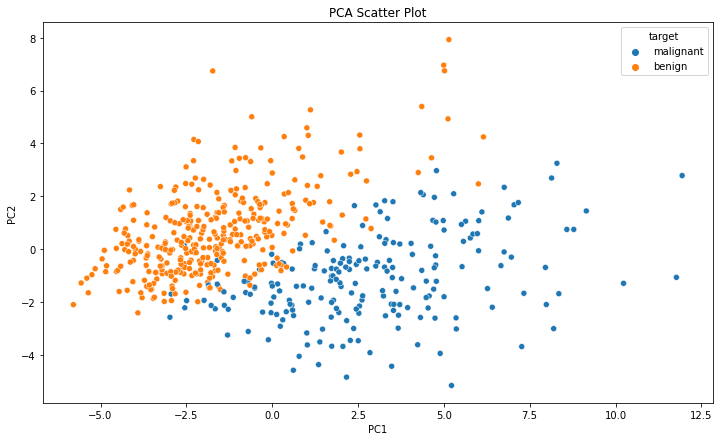

In [11]:
# Now, we can create a visualization of our dataset
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="target" # Grouping data points with different colors
)

plt.title('PCA Scatter Plot')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
it can be deduced that the data are linearly separable and therefore a linear model could be an good solution to solve a classification problem. 
</div>


*In the PCA, the next question is “how many principal components are we going to choose for our new feature subspace?*

A number of principal components must be considered such that they **take into account a sufficiently high percentage of total variance** (at least 70%, for example, when stop increasing substantially). When defining the minimum percentage of acceptable variance, the number of original variables should be taken into account, so that as the number of variables increases, a lower percentage of explained variance may be accepted.

**The explained variance tells us how much information (variance) can be attributed to each of the principal components**


In [80]:
pca2d.explained_variance_ratio_

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

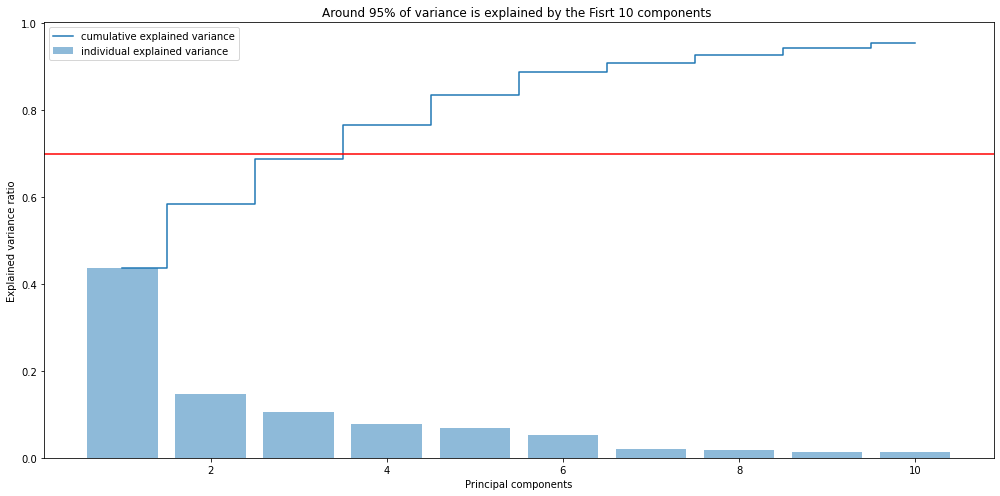

In [13]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
pca10.fit(df_X_scaled.values)

plt.figure(1, figsize=(14, 7))
plt.bar(range(1,11,1), pca10.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,11,1),pca10.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title("Around 95% of variance is explained by the Fisrt 10 components ");
plt.legend(loc='best')
plt.axhline(y=0.7, color='r', linestyle='-') # 70% of  explained variance
plt.tight_layout()

* PC1 describes most of the variability in the data, PC2 adds the next big contribution, and so on. In the end, the last PCs do not bring much more
information to describe the data.
* Thus, to describe the data we could use only the top m < n (i.e., i;, PC1, ⋯ PCn) components with little - if any - loss of information

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>   A good number of principal component can be 6 because the total explained variance stops increasing substantially or I can choose 3 with the explained variance of 74% is enough (and the rest is noise)  </div>

You can find more dimensionality reduction techniques in the [APPENDIX](#APPENDIX).

## TSNE (T-distributed Stochastic Neighbor Embedding)
* [TSNE](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is a non-linear dimensionality reduction technique that is particularly suited to reducing the complexity of multidimensional datasets in a two- or three-dimensional model. 
* Unlike PCA, it tries to preserve the local data structure by minimizing the difference (KL divergence) between the two high-dimensional spaces and the low-dimensional space**It is better than PCA, but it is computationally expensive**

In [14]:
from sklearn.manifold import TSNE

# instance the TSNE for 2 compoments
tsne_2d = TSNE(n_components=2)

# Fit df_X_scaled into an lower space and return that transformed output.
tsne_results = tsne_2d.fit_transform(df_X_scaled.values)

# save results into a dataframe
tsne_df = pd.DataFrame(data = tsne_results , columns = ['C1', 'C2'])
tsne_df['target'] = df_y.values # add the target variabile

print(tsne_df.shape)
tsne_df.head(3)

(557, 3)


,C1,C2,target
0,18.165665,-27.512005,malignant
1,10.654234,-11.711679,malignant
2,17.986725,-22.627783,malignant


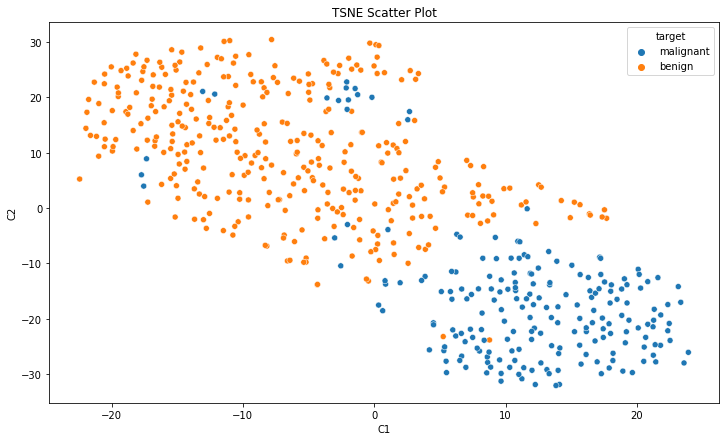

In [15]:
# Now, we can create a visualization of our dataset
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=tsne_df, x="C1", y="C2", hue="target" # Grouping data points with different colors
)

plt.title('TSNE Scatter Plot')
plt.show()

# Clustering
Discover hidden structures in unlabeled data (unsupervised).
Clustering identifies a finite set of groups (clusters) C1, C2 ⋯ , Ck in the dataset such that:
* Objects within the same cluster Ci shall be as similar as possible
* Objects of different clusters Ci, Cj (i ≠ j) shall be as dissimilar as possible

Clustering algorithms can be categorized based on their cluster model.

In [16]:
from IPython.display import HTML
# Clustering
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/cSrKc0A2gv0?end=60" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## K-Means
**K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.**
The means are commonly called the cluster “centroids”; 
![image](images/cluster1.jpg)
**K-Means Algorithm:**
1. Guess some cluster centers
2. Repeat until converged
    - *Find closest centroid*: assign points to the nearest cluster center
    - *Update centroid*: set the cluster centers to the mean
    


<img src='images/1_rwYaxuY-jeiVXH0fyqC_oA.gif'>

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): The KMeans estimator class in scikit-learn perform  K-Means Clustering.

<!-- 1. Getting  K values as input which is the number of clusters or centroids
2. Selecting random centroids for each cluster
3. Assigning each data point to its closest centroid (Euclidean distance)
4. Adjusting the centroid for the newly formed cluster in step 3
5. Repeating step 3 and 4 till all the data points are perfectly organised within a cluster space -->

In [17]:
from sklearn.cluster import KMeans

X = df_X_scaled.values

 # k-means++ is an algorithm for choosing a good initial centroids (far away from each other). https://en.wikipedia.org/wiki/K-means%2B%2B
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

# kmeans.labels_ 
kmeans.inertia_ # error

8883.80978369483

### The Good Number Of Clusters
Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS or SSE). 

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.
The total within-cluster sum of square measures the compactness (i.e goodness) of the clustering and we want it to be as small as possible.

![image.png](images/1_zlZOSJB_DISgUxb06QwISw.png)

We can find the good value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.
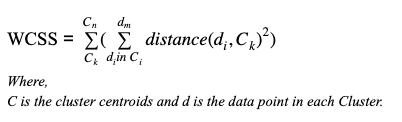

In [18]:
from IPython.display import HTML
# Clustering 
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/cSrKc0A2gv0?start=62&end=120" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


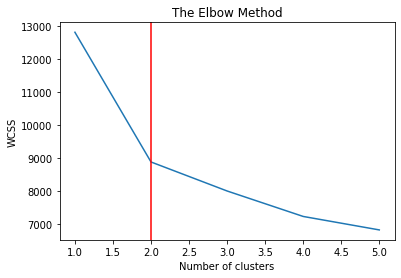

In [19]:
X = df_X_scaled.values 

from sklearn.cluster import KMeans

wcss = []
n_clusters = 5

for i in range(1, n_clusters+1):
    #Compute kmeans for different values of k. For instance, by varying k from 1 to 5 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # k-means++ is an algorithm for choosing a good initial centroids. 
    # For each k, calculate the total within-cluster sum of square (wss)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, n_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=2, color='r', linestyle='-')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>   The “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
For the above-given graph, the good value for K would be 2 </div>


In [20]:
# k-means++ is an algorithm for choosing the initial centroids. New centroid is a far point from the other centroids
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

pc_df['cluster'] = kmeans.labels_
pc_df

,PC1,PC2,target,cluster
0,8.582837,0.744168,malignant,1
1,-0.032721,-2.407943,malignant,0
2,4.573597,-1.774332,malignant,1
3,2.249629,-0.769603,malignant,1
4,4.399988,2.057585,malignant,1
...,...,...,...,...
552,3.669393,-2.992662,malignant,1
553,1.466327,-3.028465,malignant,1
554,0.522751,-2.084349,malignant,0
555,10.233998,-1.295531,malignant,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

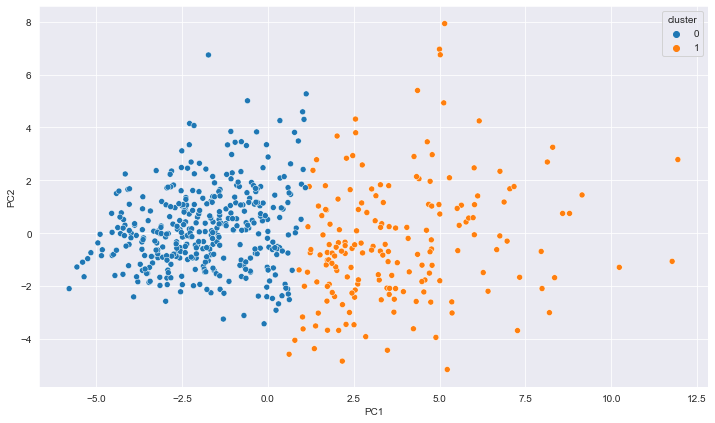

In [45]:
plt.figure(figsize=(12, 7))
# scatter plot to group data points with different colors 
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="cluster" # Grouping data points with different colors
)

In [22]:
pc_df.groupby('cluster').mean()
pc_df.groupby('target').mean()

,PC1,PC2,cluster
target,,,
benign,-1.645176,0.650441,0.076705
malignant,2.824888,-1.116855,0.756098


Text(0.5, 1.0, 'K-Means clustering plot')

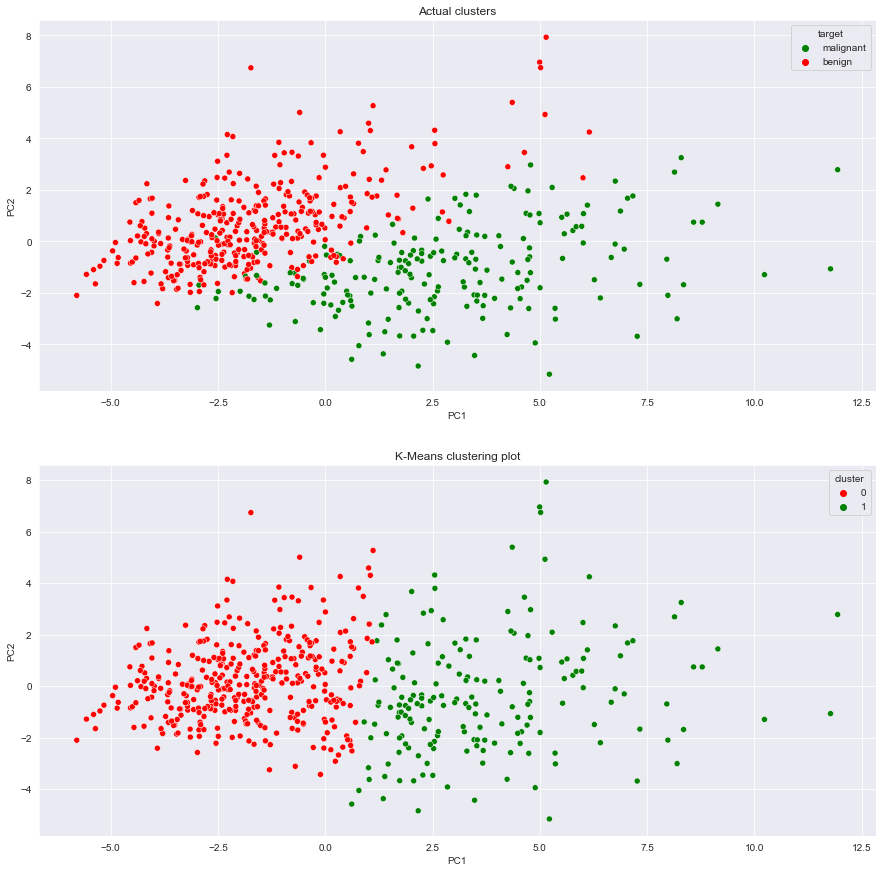

In [74]:

# Scatter plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))

sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="target", ax=ax1,  palette=['green', 'red']  # Grouping data points with different colors (sns.color_palette())
)
ax1.set_title("Actual clusters")
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="cluster", ax=ax2,  palette=['red', 'green']  # Grouping data points with different colors
)
ax2.set_title("K-Means clustering plot")

# fig.savefig?

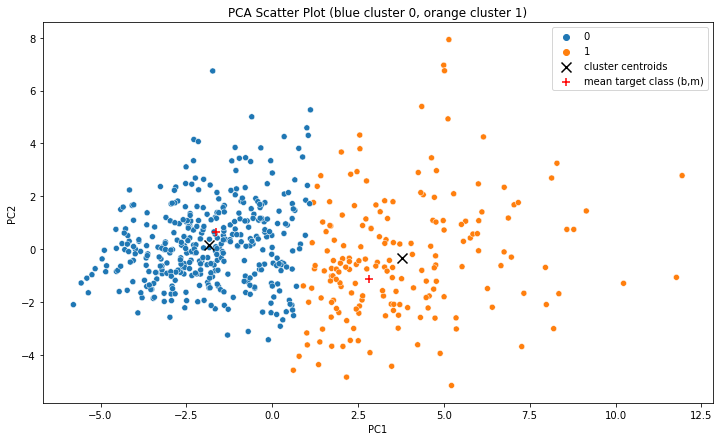

In [23]:
plt.figure(figsize=(12, 7))
# scatter plot to group data points with different colors 
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="cluster" # Grouping data points with different colors
)

# to plot cluster centroids
df_centroid_pca = pc_df.groupby('cluster').mean()
plt.scatter(df_centroid_pca.iloc[:,0],df_centroid_pca.iloc[:,1], c='black', marker='x',s=100,
            label="cluster centroids")  



# to plot cluster centroids
df_mean_pca = pc_df.groupby('target').mean()
plt.scatter(df_mean_pca.iloc[:,0],df_mean_pca.iloc[:,1], c='red',marker='+',s=50,
            label="mean target class (b,m)") 


plt.legend()
plt.title('PCA Scatter Plot (blue cluster 0, orange cluster 1)')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  : It is interesting to see how the centroids of the clusters fall very close to the average values of the two classes of tumors (benign and malignant). Therefore it is possible to note that, if we did not have a labeled dataset (with well-defined classes B and M) we would still be able to determine (with good probability) the class of belonging of the dataset elements, through an unsupervised clustering process .</div>

## Hierarchical clustering

In [24]:
from IPython.display import HTML
# Clustering 
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/cSrKc0A2gv0?start=123" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. [wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering)

<!-- **Construction of a hierarchy of clusters (dendrogram) by merging/separating clusters with minimum/maximum distance** -->

* The agglomerative follows the bottom-up approach, which builds up clusters **starting with single object and then merging these atomic clusters into larger and larger clusters using a linkage function**, until all of the objects are finally lying in a single cluster or otherwise until certain termination conditions are satisfied**. 
* The divisive hierarchical clustering follows the top-down approach, which **breaks up cluster containing all objects into smaller clusters**, until each object forms a cluster on its own or until it satisfies certain termination conditions. 

<img src='images/hclustering.jpg' />

**Base Algorithm** (agglomerative)
1. Form initial clusters consisting of a single object, and compute the distance between each pair of clusters.
2. Merge the two clusters having minimum distance.
3. Calculate the distance between the new cluster and all other clusters.
4. If there is only one cluster containing all objects: Stop, otherwise go to step 2. 

<img src='images/hclustering_measures.jpg' width='700' />

In [25]:
# from src.utils import plot_dendrograms
# plot_dendrograms(X) # Ward dendrom has well separated and compact clusters 


**[linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from scipy.cluster.hierarchy models performs hierarchical/agglomerative clustering using Ward method.**

*Note: We used the Ward linkage method, it has the highest performance in most situations, except when there were verylarge differences among cluster sizes (ref. 
[A COMPARISON OF HIERARCHICAL METHODS FOR CLUSTERING FUNCTIONAL DATA](https://people.stat.sc.edu/Hitchcock/compare_hier_fda.pdf)).*


In [26]:
from scipy.cluster.hierarchy import linkage # to perform hierarchical/agglomerative clustering

X = df_X_scaled.values 

# Perform hierarchical/agglomerative clustering using Ward method. 
Z = linkage(X, method='ward') 


Now, we want to plot the hierarchical clustering as a [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

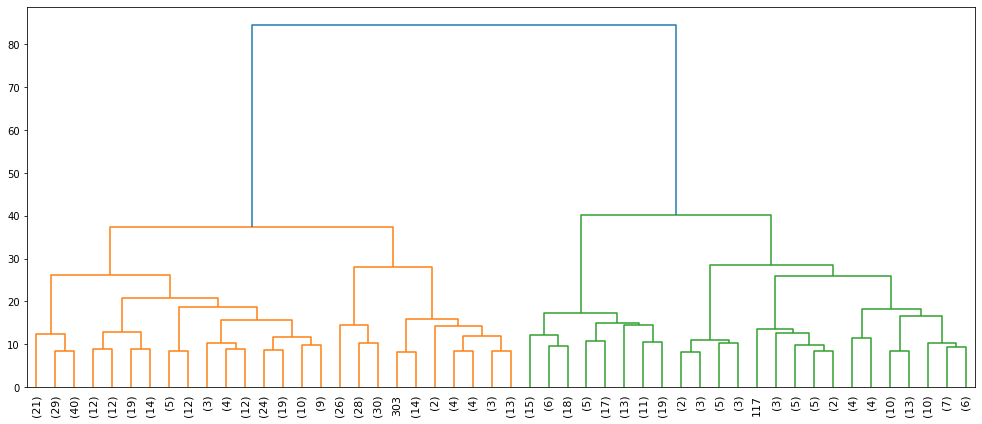

In [27]:
from scipy.cluster.hierarchy import dendrogram #  plot the hierarchical clustering as a dendrogram

# plots dendogram
plt.figure(figsize=(17, 7))

dendrogram(
    Z,                            # The linkage matrix 
    leaf_font_size=11.,           # 
    truncate_mode = 'lastp',      # Truncation is used to condense the dendrogram, show only p clusters
    p=50,                          # number cluster to plot in condensed dendrogram
    color_threshold = 41           # Colors clusters below this cutoff threshold. if None it cuts to 70% of the maximum length) by default
)

plt.show()

* horizontal lines are cluster merges
* vertical lines tell you which clusters/labels were part of merge forming that new cluster
* heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
* a huge jump in distance is typically what we're interested to find the optimal number of clusters. 

*Note: There are some automated Cut-Off selection methods [but they are not very reliable](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)*





**We have 2 well separated clusters.**
We can form 2 flat clusters from hierarchical clustering using [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html?highlight=fcluster#scipy.cluster.hierarchy.fcluster)

In [28]:
from scipy.cluster.hierarchy import fcluster

#  get 2 flat clusters from the hierarchical clustering defined by the given linkage matrix.
k=2 
clusters = fcluster(Z, k, criterion='maxclust')

clusters[:30] 

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2], dtype=int32)

In [29]:
# we add the column with the clusters found to the dataframe that contains the 2 principal components
pc_df['hcluster'] = clusters
pc_df

,PC1,PC2,target,cluster,hcluster
0,8.582837,0.744168,malignant,1,2
1,-0.032721,-2.407943,malignant,0,2
2,4.573597,-1.774332,malignant,1,2
3,2.249629,-0.769603,malignant,1,2
4,4.399988,2.057585,malignant,1,2
...,...,...,...,...,...
552,3.669393,-2.992662,malignant,1,2
553,1.466327,-3.028465,malignant,1,2
554,0.522751,-2.084349,malignant,0,1
555,10.233998,-1.295531,malignant,1,2


Comparison between real centroids and hierarchical clustering centroids (*exactly as we did for the Kmeans *)

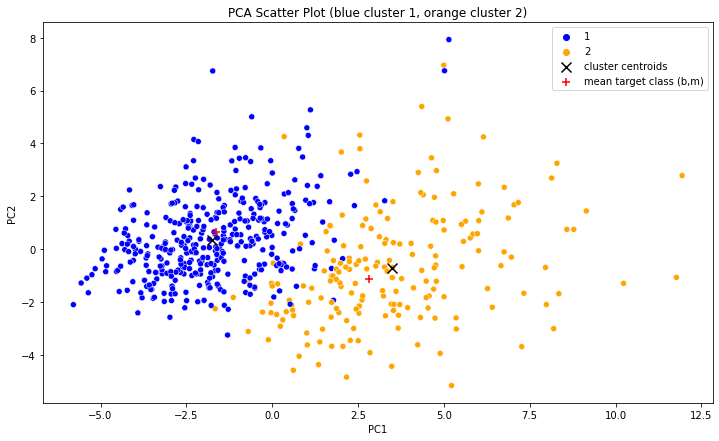

In [30]:
# scatter plot to group data points with different colors 
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="hcluster", palette=['blue','orange'] # Grouping data points with different colors
)

# to plot cluster centroids
df_centroid_pca = pc_df.groupby('hcluster').mean()
plt.scatter(df_centroid_pca.iloc[:,0],df_centroid_pca.iloc[:,1], c='black', marker='x',s=100,
            label="cluster centroids")  

# to plot mean for Benign and Malignant 
df_mean_pca = pc_df.groupby('target').mean()
plt.scatter(df_mean_pca.iloc[:,0],df_mean_pca.iloc[:,1], c='red',marker='+',s=50,
            label="mean target class (b,m)") 


plt.legend()
plt.title('PCA Scatter Plot (blue cluster 1, orange cluster 2)')
plt.show()

# APPENDIX

This appendix includes further information on the course topics but **will not be exam topics**.

## Dimensionality Reduction 
### Feature Selection using Scikit Learn
Feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 
* [SelectKBest()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) removes all but the k highest scoring features
[The Chi-square (χ2) test](https://en.wikipedia.org/wiki/Chi-squared_test) is used to examine whether observed data fits with expected data.

It is a test of independence and it is used to determine if there is a significant relationship between two variables. **Recall that the chi-square test measures dependence between stochastic variables**, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [31]:
from sklearn.feature_selection import SelectKBest,chi2
def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    base on the chi-square (χ2) and return a new dataframe wiht k best features"""
    
    selector =SelectKBest(chi2, k=k)
    best_X = selector.fit_transform(X, y)
    
    return pd.DataFrame(best_X, columns=X.columns[selector.get_support()])

best_X = selector(df_X, df_y, 5)

best_X.head()

,mean texture,mean area,area error,worst texture,worst concavity
0,10.38,1001.0,153.40,17.33,0.7119
1,17.77,1326.0,74.08,23.41,0.2416
2,21.25,1203.0,94.03,25.53,0.4504
3,14.34,1297.0,94.44,16.67,0.4000
4,15.70,477.1,27.19,23.75,0.5355


### PCA
PCA is a statistical procedure that (orthogonally) transforms the original n coordinates of a data set into a new set of n coordinates,
called principal components.

`(PC1, PC2,..,PCn)=PCA(X1,X2,...,Xn)`

The first principal component PC1 follows the direction (eigenvector) of the largest possible variance (largest eigenvalue of the covariance matrix) in the data.

Each succeeding component PCk follows the direction of the next largest possible variance under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components

In a nutshell, The principal components  are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix. 
![](images/pca_2.jpg)

In [32]:
# 1. correlated hi-d data [N x D]
df_X_scaled 
# 2. center the points
centered = df_X_scaled-df_X_scaled.mean()
#3. compute covariance matrix
cov_matrix = centered.cov()
# 4. determine  eigenvectors (U) + eignvalues (S) of covariance matrix
U,S,V = np.linalg.svd(cov_matrix) 
# 5. pick n_components < D  eigenvectors  (np.linalg.svd returns the eigenvectors sorted by their eigenvalues)
n_components = 2
components = U[:,:n_components]
# 6.  project data point to those eigenvectos 
X_reduced = np.dot(df_X_scaled, components) # X_reduced becomes [N x 2]
# 7. uncorrelated low-d data
X_reduced

array([[ -8.58283713,  -0.74416752],
       [  0.03272142,   2.40794256],
       [ -4.5735973 ,   1.77433201],
       ...,
       [ -0.52275139,   2.08434941],
       [-10.2339982 ,   1.29553091],
       [  4.88817916,   0.04471306]])

In [33]:

from IPython.display import HTML
# Extract from Principal component analysis (PCA)  youtube video by Serrano.Academy
HTML('<iframe width="1200" height="700" src="https://www.youtube.com/embed/g-Hb26agBFg?start=1252&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#### 3D PCA

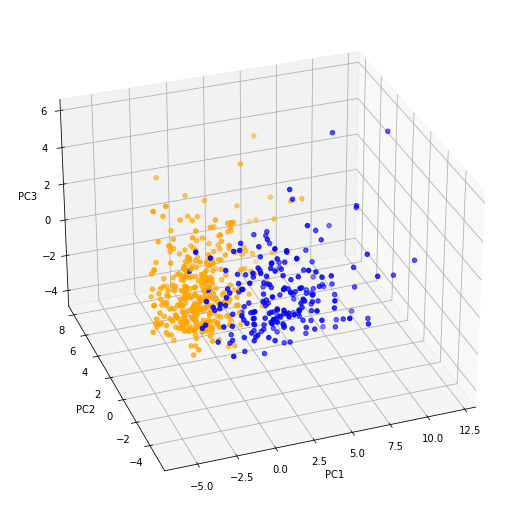

In [34]:
#3D scatter plot
pca3d = PCA(n_components=3)
pc3 = pca3d.fit_transform(df_X_scaled.values)

from mpl_toolkits.mplot3d import Axes3D # 3D scatter plot
fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig) 

cmap = {'benign':'orange','malignant':'blue'}
ax.scatter(pc3[:,0], pc3[:,1], pc3[:,2], c=[cmap[c] for c in  df_y.values],
           marker='o', s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(30,-110)
plt.show()

#### Visualize Loadings
It is also possible to visualize loadings using shapes, and use annotations to indicate which feature a certain loading original belong to. 

* PCA loading plot which shows how strongly each characteristic influences a principal component.

For more details about the linear algebra behind eigenvectors and loadings, see this [Q&A thread](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another).

In [2]:
from pyembeds.vis.utils import biplot_pca
biplot_pca( pc_df, pca2d, df_X_scaled.columns.values)

NameError: name 'pc_df' is not defined

Continuing the exploratory process aimed at understanding how to simplify the dataset, without losing relevant information, the following processes were applied:  UMAP and TSNE , which are techniques for reducing complexity; in particular:
### TSNE and UMAP
* [TSNE (T-distributed Stochastic Neighbor Embedding)](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is a non-linear dimensionality reduction technique that is particularly suited to reducing the complexity of multidimensional datasets in a two- or three-dimensional model. **It is better than PCA, but it is computationally expensive**


In [36]:
from IPython.display import HTML
# see StatQuest: t-SNE, Clearly Explained video from youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NEaUSP4YerM?mute=1&start=120&end=250&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

* [UMAP (Uniform Manifold Approximation and Projection)](https://arxiv.org/abs/1802.03426) is a dimension reduction technique that can be used for visualisation **similarly to t-SNE, but with superior run time performance.**

In [37]:
from IPython.display import HTML
# see AICoffeeBreak UMAP explained | The best dimensionality reduction?
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/6BPl81wGGP8?mute=1&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



By reducing the dimension in a way that preserves as much of the structure of the data as possible we can get a visualisable representation of the data allowing us to “see” the data and its structure and begin to get some intuition about the data itself.

In [38]:
#  umap-learn for umap dimension reduction
%pip install pip -U
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


[Tue May 31 05:54:01 2022] Starting
[Tue May 31 05:54:06 2022] Completed TSNE
[Tue May 31 05:54:17 2022] Completed UMAP
[Tue May 31 05:54:17 2022] Completed PCA


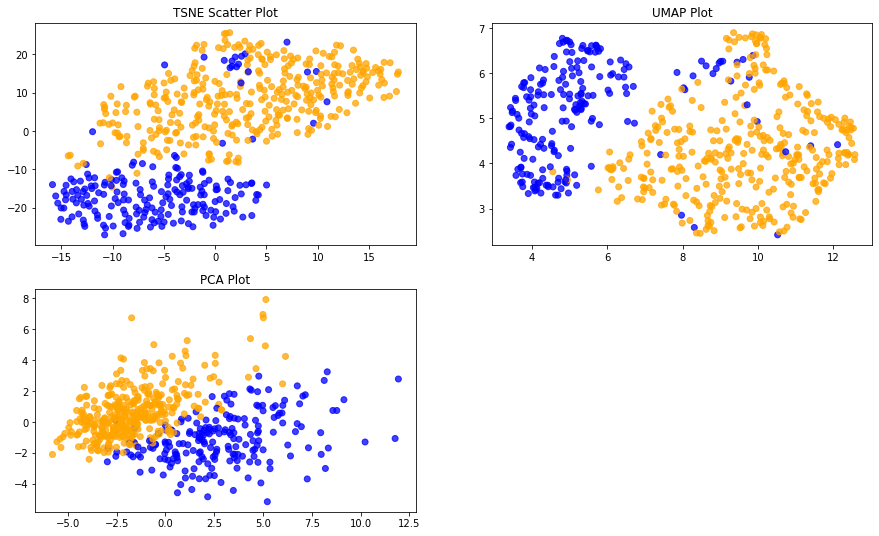

In [39]:
from umap import UMAP
from sklearn.manifold import TSNE
import time 
X = df_X_scaled.values
y = df_y.values 

print(f"[{time.asctime(time.localtime())}] Starting")
# Invoke the TSNE method
tsne_results = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=2000).fit_transform(X)
print(f"[{time.asctime(time.localtime())}] Completed TSNE")
# Invoke the UMAP method
reducer = UMAP().fit_transform(X) 
print(f"[{time.asctime(time.localtime())}] Completed UMAP")
# Invoke the PCA method
pc = PCA(n_components=2).fit_transform(X)
print(f"[{time.asctime(time.localtime())}] Completed PCA")

# Plot the TSNE and PCA visuals side-by-side
cmap = {'benign':'orange','malignant':'blue'}
fig = plt.figure(figsize = (15,9))

plt.subplot(2, 2, 1)
plt.title('TSNE Scatter Plot')
plt.scatter(tsne_results[:,0], tsne_results[:,1],  c =[cmap[x] for x in y] , alpha=0.75)

plt.subplot(2, 2, 2)
plt.title('UMAP Plot')
plt.scatter( reducer[:,0], reducer[:,1], c =[cmap[x] for x in y] ,alpha=0.75)
      
plt.subplot(2, 2, 3)
plt.title('PCA Plot')
plt.scatter( pc[:,0], pc[:,1], c =[cmap[x] for x in y] ,alpha=0.75)


plt.show()

## Clustering
[sklearn.cluster Module](https://scikit-learn.org/stable/modules/clustering.html) contains several Clustering models 
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)
<!--  The next section introduces hierarchical clustering, but before we will introduce a well-known clustering quality measure. -->

Clustering techniques can be divided into two approaches: partitional (like Kmeans) and hierarchical.
We suggest [Amit Saxena et al., A review of clustering techniques and developments, 2017](https://doi.org/10.1016/j.neucom.2017.06.053) paper for comprehensive study on clustering



### Silhouette: Clustering quality measure
Silhouette-Coefficient measures the quality of clustering
* a(x): distance of object x to its cluster representative
* b(x): distance of object x to the representative of the second-best cluster
* Silhouette s(x) of x
![image.png](images/silhouette.png)

Computes silhouette coefficients for each point, and **average it out for all the samples to get the silhouette score**.

**The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).**
The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
# The silhouette_score gives the average value for all the samples.
silhouette_score(X,  kmeans.labels_)

0.3151180959299782

For n_clusters =2  The average silhouette_score is : 0.32


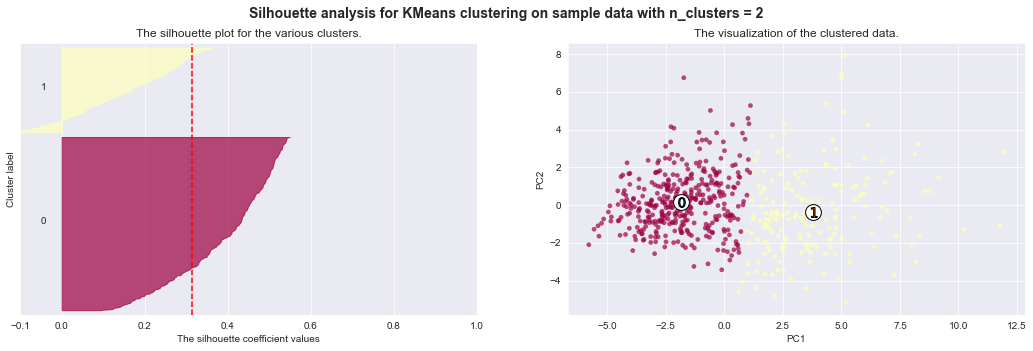

For n_clusters =3  The average silhouette_score is : 0.23


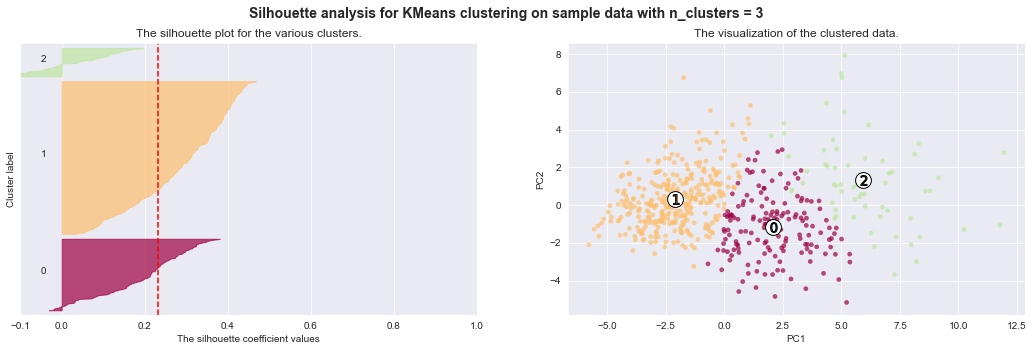

For n_clusters =4  The average silhouette_score is : 0.17


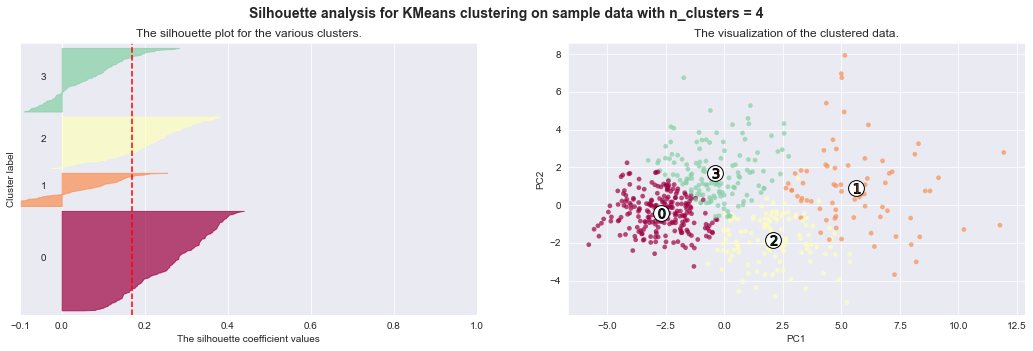

For n_clusters =5  The average silhouette_score is : 0.14


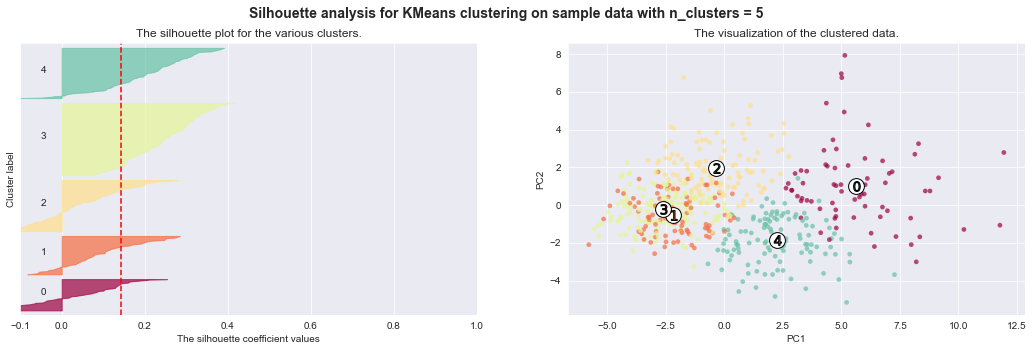

In [41]:
from src.utils import kmeeans_silhouette_analysis
sns.set_style('darkgrid') 
kmeeans_silhouette_analysis(X, range(2, n_clusters+1))

The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

    
* In our example, the analysis of the silhouette is used to choose an optimal value for the number of clusters. The silhouette plot shows that a n_clusters value of 5 and 6 is not good because they have the silhouette score lower than average scores, many negative values and also large fluctuations in the size of the silhouette plot. **From the analysis of the silhouette, a good number of k clusters appears to be 2 since it confirms what has already been expressed by the elbow method.**

* Both Elbow method / SSE Plot and Silhouette method can be used interchangeably based on the details presented by the plots. It may be good idea to use both the plots just to make sure that you select most optimal number of clusters.

</div>

In [42]:
silhouette_score(X,  clusters)

0.29067952066802044